In [1]:
from typing import List, Callable

import numpy as np
import pandas as pd
from experiments.common import run_increasing_size_neighborhoods_experiments
from experiments.data.synthetic_benchmarks import (
    benchmark_curve_1,
    benchmark_curve_2,
    benchmark_curve_3,
    benchmark_curve_4,
    benchmark_curve_5,
)

%load_ext autoreload
%autoreload 2

# Experiments in dense homoscedastic settings with increasing window size
The following are plots and metrics for a number of experimental settings with dense homoscedastic curves comparing the proposed Robust Local Polynomial Regression with Similarity Kernels method with LOWESS, robust LOWESS, kernel regression, local polynomial and RBF network regression. The plots are interactive and allows to hide and show different elements by clicking or double-clicking as well as to zoom in on areas of interest. 

In [2]:
extreme_noise_ratio: float = 0.95
high_noise_ratio: float = 0.65
medium_noise_ratio: float = 0.35
mild_noise_ratio: float = 0.15
hetero: bool = False
num_points: int = 150

size_neighborhoods: List[int] = [5, 7, 9, 11, 13, 15] + np.linspace(
    start=20, stop=num_points, num=10, endpoint=True
).astype(int).tolist()

bw1_f: Callable[[np.ndarray], List[float]] = (
    lambda data: [float(1 / np.clip(a=0.1 * data.shape[0], a_min=2.0, a_max=27.0))] * data.shape[1]
)

methods: List[str] = [
    "rsklpr",
    "lowess",
    "robust_lowess",
    "kernel_reg_ll",
    "kernel_reg_lc",
    "local_quad",
    "rbfnet",
]

## Curve 1

### Mild noise

Best performing method is rsklpr for size_neighborhood w_20


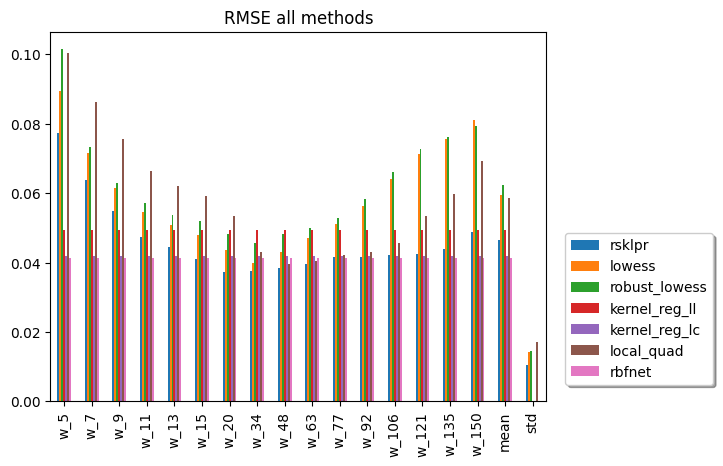

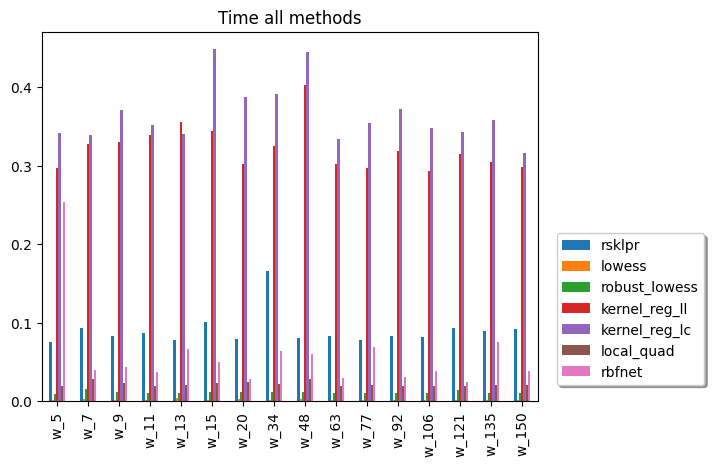

In [3]:
best_for_window: pd.DataFrame
worst_for_window: pd.DataFrame

best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_1,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [4]:
best_for_window

method      rmse
w_5    rbfnet  0.041223
w_7    rbfnet  0.041233
w_9    rbfnet  0.041171
w_11   rbfnet  0.041270
w_13   rbfnet  0.041231
w_15   rsklpr  0.041062
w_20   rsklpr  0.037372
w_34   rsklpr  0.037461
w_48   rsklpr  0.038411
w_63   rsklpr  0.039591
w_77   rbfnet  0.041215
w_92   rbfnet  0.041256
w_106  rbfnet  0.041299
w_121  rbfnet  0.041188
w_135  rbfnet  0.041213
w_150  rbfnet  0.041198

In [5]:
worst_for_window

method      rmse
w_5    robust_lowess  0.101410
w_7       local_quad  0.086359
w_9       local_quad  0.075569
w_11      local_quad  0.066371
w_13      local_quad  0.062139
w_15      local_quad  0.059111
w_20      local_quad  0.053357
w_34   kernel_reg_ll  0.049255
w_48   kernel_reg_ll  0.049255
w_63   robust_lowess  0.049961
w_77   robust_lowess  0.052808
w_92   robust_lowess  0.058417
w_106  robust_lowess  0.066132
w_121  robust_lowess  0.072713
w_135  robust_lowess  0.076114
w_150         lowess  0.081175

### Medium noise

Best performing method is rsklpr for size_neighborhood w_121


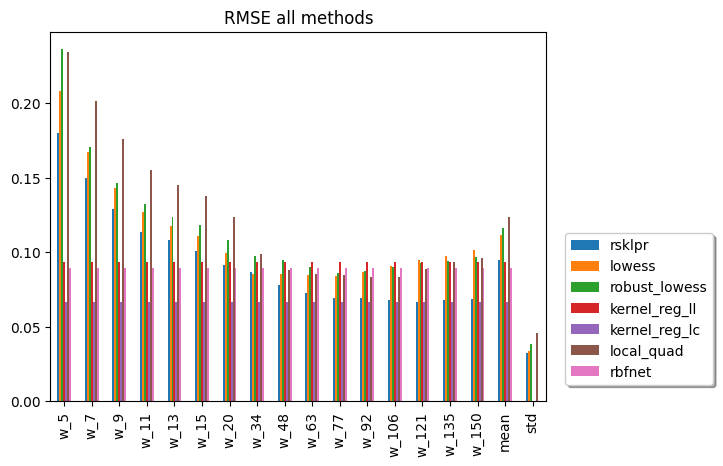

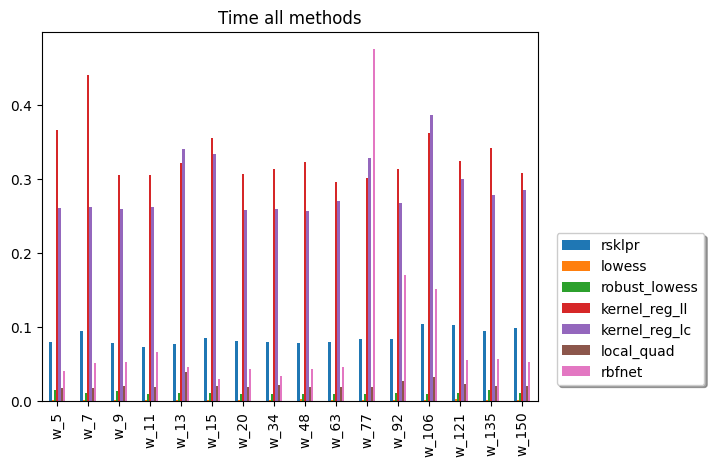

In [6]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_1,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [7]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.066849
w_7    kernel_reg_lc  0.066849
w_9    kernel_reg_lc  0.066849
w_11   kernel_reg_lc  0.066849
w_13   kernel_reg_lc  0.066849
w_15   kernel_reg_lc  0.066849
w_20   kernel_reg_lc  0.066849
w_34   kernel_reg_lc  0.066849
w_48   kernel_reg_lc  0.066849
w_63   kernel_reg_lc  0.066849
w_77   kernel_reg_lc  0.066849
w_92   kernel_reg_lc  0.066849
w_106  kernel_reg_lc  0.066849
w_121         rsklpr  0.066439
w_135  kernel_reg_lc  0.066849
w_150  kernel_reg_lc  0.066849

In [8]:
worst_for_window

method      rmse
w_5    robust_lowess  0.236183
w_7       local_quad  0.201506
w_9       local_quad  0.176316
w_11      local_quad  0.154954
w_13      local_quad  0.145020
w_15      local_quad  0.137865
w_20      local_quad  0.123998
w_34      local_quad  0.098886
w_48   robust_lowess  0.094839
w_63   kernel_reg_ll  0.093659
w_77   kernel_reg_ll  0.093659
w_92   kernel_reg_ll  0.093659
w_106  kernel_reg_ll  0.093659
w_121         lowess  0.094896
w_135         lowess  0.097559
w_150         lowess  0.101491

### High noise

Best performing method is rsklpr for size_neighborhood w_121


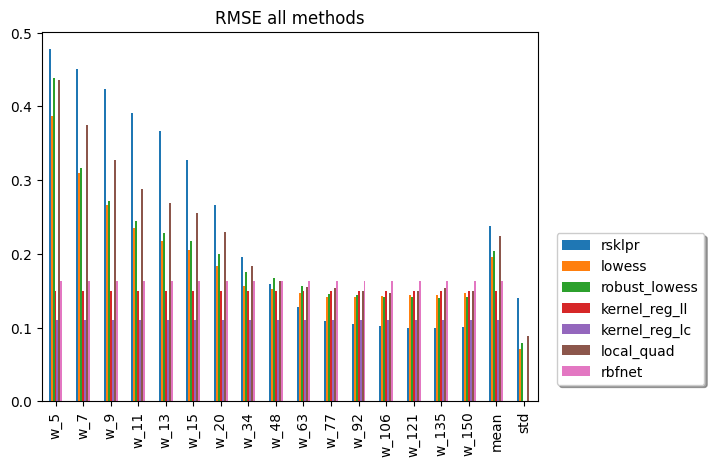

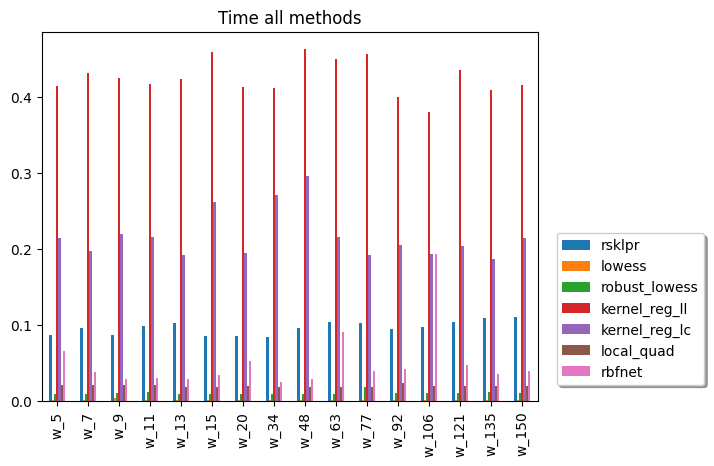

In [9]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_1,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="normal_reference",
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [10]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.111041
w_7    kernel_reg_lc  0.111041
w_9    kernel_reg_lc  0.111041
w_11   kernel_reg_lc  0.111041
w_13   kernel_reg_lc  0.111041
w_15   kernel_reg_lc  0.111041
w_20   kernel_reg_lc  0.111041
w_34   kernel_reg_lc  0.111041
w_48   kernel_reg_lc  0.111041
w_63   kernel_reg_lc  0.111041
w_77          rsklpr  0.109214
w_92          rsklpr  0.104391
w_106         rsklpr  0.102558
w_121         rsklpr  0.099958
w_135         rsklpr  0.100176
w_150         rsklpr  0.100431

In [11]:
worst_for_window

method      rmse
w_5           rsklpr  0.477333
w_7           rsklpr  0.450836
w_9           rsklpr  0.424056
w_11          rsklpr  0.390696
w_13          rsklpr  0.366745
w_15          rsklpr  0.327482
w_20          rsklpr  0.266446
w_34          rsklpr  0.195427
w_48   robust_lowess  0.167791
w_63          rbfnet  0.163573
w_77          rbfnet  0.163545
w_92          rbfnet  0.163563
w_106         rbfnet  0.163638
w_121         rbfnet  0.163617
w_135         rbfnet  0.163579
w_150         rbfnet  0.163646

### Extreme noise

Best performing method is rsklpr for size_neighborhood w_150


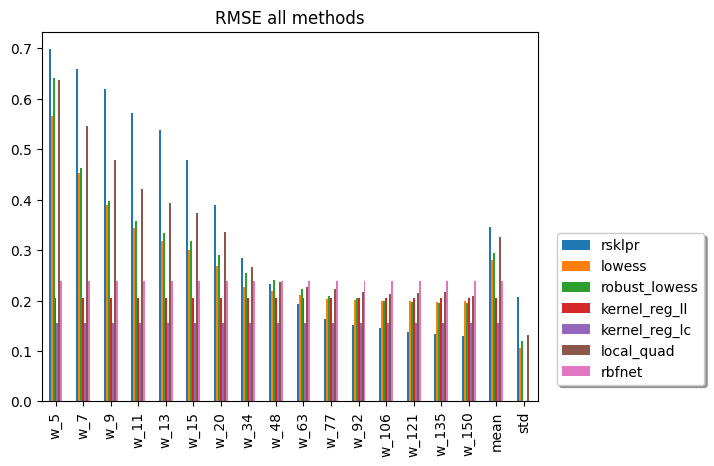

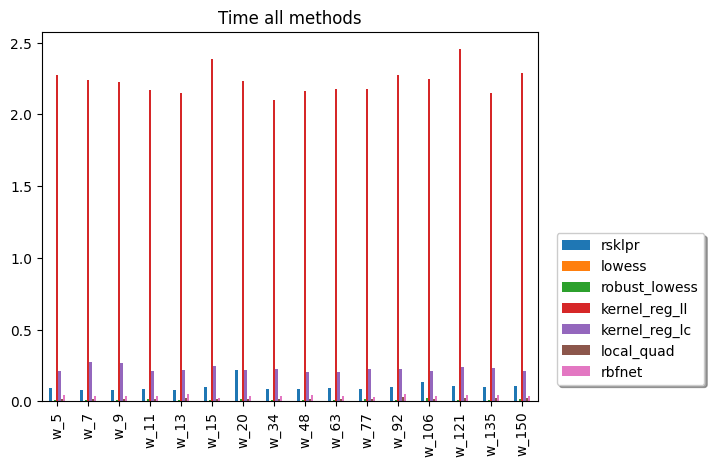

In [12]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_1,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="normal_reference",
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [13]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.155095
w_7    kernel_reg_lc  0.155095
w_9    kernel_reg_lc  0.155095
w_11   kernel_reg_lc  0.155095
w_13   kernel_reg_lc  0.155095
w_15   kernel_reg_lc  0.155095
w_20   kernel_reg_lc  0.155095
w_34   kernel_reg_lc  0.155095
w_48   kernel_reg_lc  0.155095
w_63   kernel_reg_lc  0.155095
w_77   kernel_reg_lc  0.155095
w_92          rsklpr  0.151315
w_106         rsklpr  0.145003
w_121         rsklpr  0.136737
w_135         rsklpr  0.133946
w_150         rsklpr  0.129892

In [14]:
worst_for_window

method      rmse
w_5           rsklpr  0.697989
w_7           rsklpr  0.659133
w_9           rsklpr  0.619885
w_11          rsklpr  0.571727
w_13          rsklpr  0.537288
w_15          rsklpr  0.479253
w_20          rsklpr  0.389454
w_34          rsklpr  0.284124
w_48   robust_lowess  0.241575
w_63          rbfnet  0.238442
w_77          rbfnet  0.238496
w_92          rbfnet  0.238418
w_106         rbfnet  0.238335
w_121         rbfnet  0.238283
w_135         rbfnet  0.238363
w_150         rbfnet  0.238487

## Curve 2

### Mild noise

Best performing method is local_quad for size_neighborhood w_48


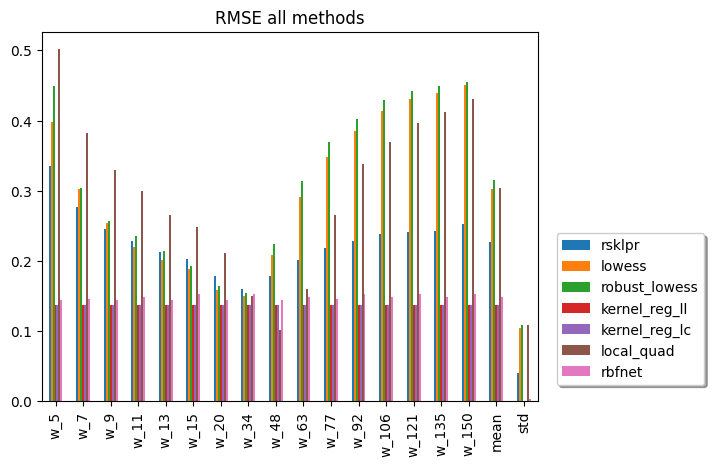

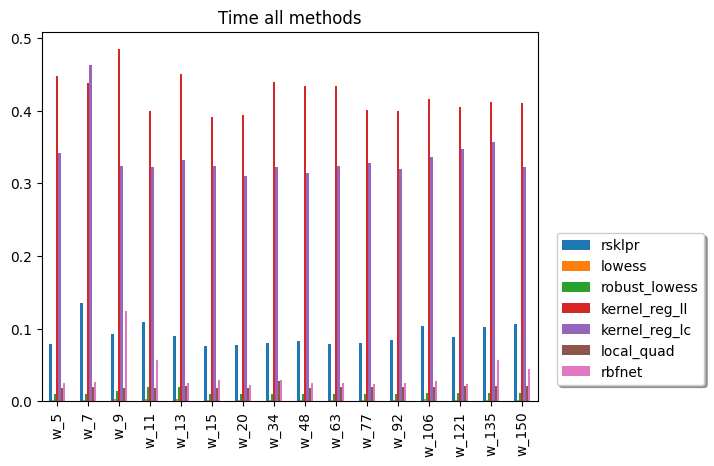

In [15]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_2,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [16]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.136609
w_7    kernel_reg_lc  0.136609
w_9    kernel_reg_lc  0.136609
w_11   kernel_reg_lc  0.136609
w_13   kernel_reg_lc  0.136609
w_15   kernel_reg_lc  0.136609
w_20   kernel_reg_lc  0.136609
w_34   kernel_reg_lc  0.136609
w_48      local_quad  0.101761
w_63   kernel_reg_lc  0.136609
w_77   kernel_reg_lc  0.136609
w_92   kernel_reg_lc  0.136609
w_106  kernel_reg_lc  0.136609
w_121  kernel_reg_lc  0.136609
w_135  kernel_reg_lc  0.136609
w_150  kernel_reg_lc  0.136609

In [17]:
worst_for_window

method      rmse
w_5       local_quad  0.501345
w_7       local_quad  0.382828
w_9       local_quad  0.329494
w_11      local_quad  0.299637
w_13      local_quad  0.265279
w_15      local_quad  0.247768
w_20      local_quad  0.210872
w_34          rsklpr  0.159933
w_48   robust_lowess  0.224056
w_63   robust_lowess  0.313254
w_77   robust_lowess  0.369059
w_92   robust_lowess  0.402434
w_106  robust_lowess  0.429441
w_121  robust_lowess  0.442791
w_135  robust_lowess  0.448830
w_150  robust_lowess  0.455525

### Medium noise

Best performing method is local_quad for size_neighborhood w_63


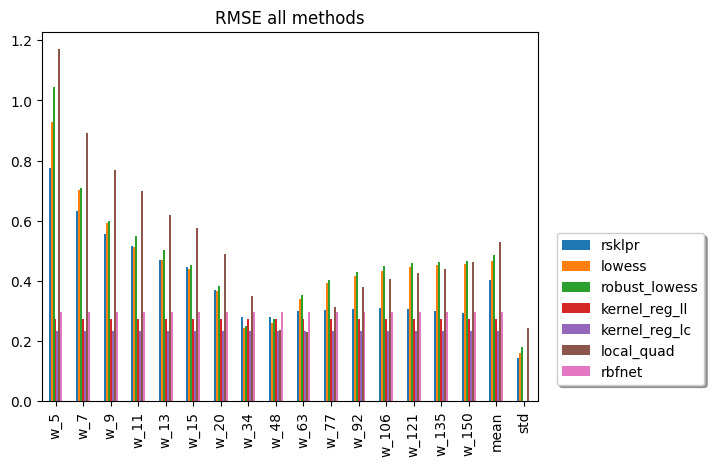

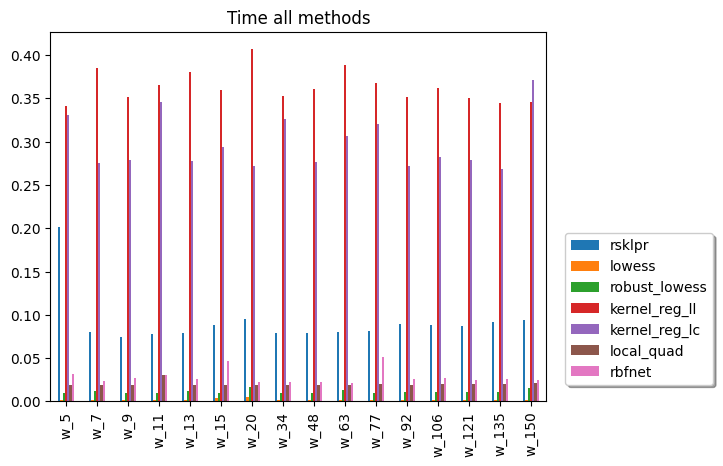

In [18]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_2,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [19]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.234775
w_7    kernel_reg_lc  0.234775
w_9    kernel_reg_lc  0.234775
w_11   kernel_reg_lc  0.234775
w_13   kernel_reg_lc  0.234775
w_15   kernel_reg_lc  0.234775
w_20   kernel_reg_lc  0.234775
w_34   kernel_reg_lc  0.234775
w_48   kernel_reg_lc  0.234775
w_63      local_quad  0.231974
w_77   kernel_reg_lc  0.234775
w_92   kernel_reg_lc  0.234775
w_106  kernel_reg_lc  0.234775
w_121  kernel_reg_lc  0.234775
w_135  kernel_reg_lc  0.234775
w_150  kernel_reg_lc  0.234775

In [20]:
worst_for_window

method      rmse
w_5       local_quad  1.169791
w_7       local_quad  0.893244
w_9       local_quad  0.768831
w_11      local_quad  0.699040
w_13      local_quad  0.618551
w_15      local_quad  0.577570
w_20      local_quad  0.490907
w_34      local_quad  0.351853
w_48          rbfnet  0.297151
w_63   robust_lowess  0.354007
w_77   robust_lowess  0.403971
w_92   robust_lowess  0.431661
w_106  robust_lowess  0.450059
w_121  robust_lowess  0.460671
w_135  robust_lowess  0.463938
w_150  robust_lowess  0.466655

### High noise

Best performing method is kernel_reg_lc for size_neighborhood w_5


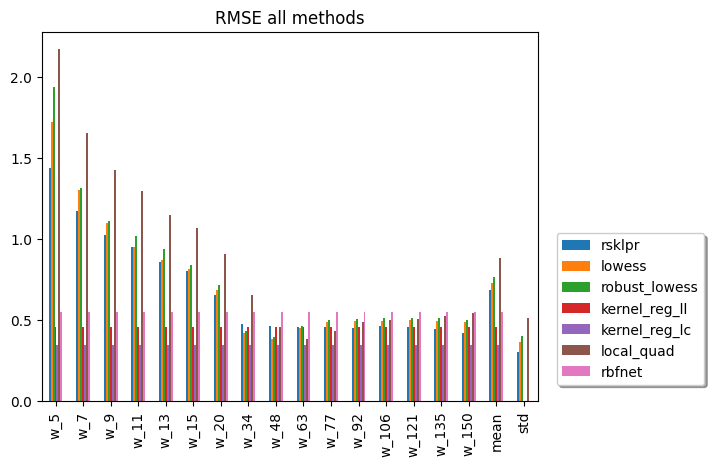

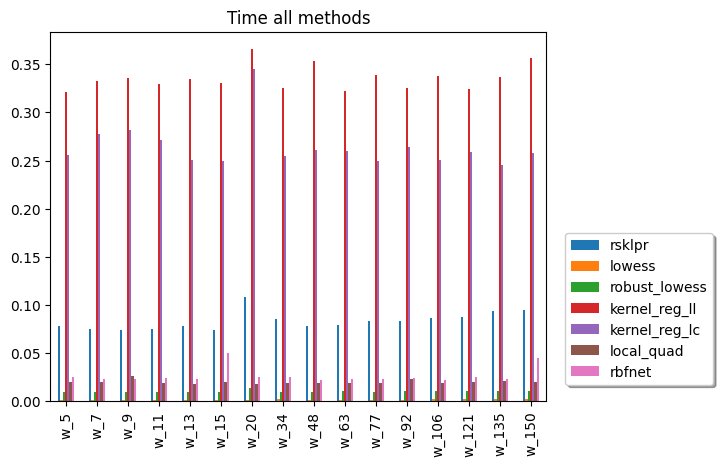

In [21]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_2,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [22]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.346692
w_7    kernel_reg_lc  0.346692
w_9    kernel_reg_lc  0.346692
w_11   kernel_reg_lc  0.346692
w_13   kernel_reg_lc  0.346692
w_15   kernel_reg_lc  0.346692
w_20   kernel_reg_lc  0.346692
w_34   kernel_reg_lc  0.346692
w_48   kernel_reg_lc  0.346692
w_63   kernel_reg_lc  0.346692
w_77   kernel_reg_lc  0.346692
w_92   kernel_reg_lc  0.346692
w_106  kernel_reg_lc  0.346692
w_121  kernel_reg_lc  0.346692
w_135  kernel_reg_lc  0.346692
w_150  kernel_reg_lc  0.346692

In [23]:
worst_for_window

method      rmse
w_5    local_quad  2.172459
w_7    local_quad  1.658868
w_9    local_quad  1.427837
w_11   local_quad  1.298146
w_13   local_quad  1.148467
w_15   local_quad  1.072291
w_20   local_quad  0.911039
w_34   local_quad  0.656253
w_48       rbfnet  0.550802
w_63       rbfnet  0.550802
w_77       rbfnet  0.550802
w_92       rbfnet  0.550770
w_106      rbfnet  0.550802
w_121      rbfnet  0.550802
w_135      rbfnet  0.550802
w_150      rbfnet  0.550802

### Extreme noise

Best performing method is kernel_reg_lc for size_neighborhood w_5


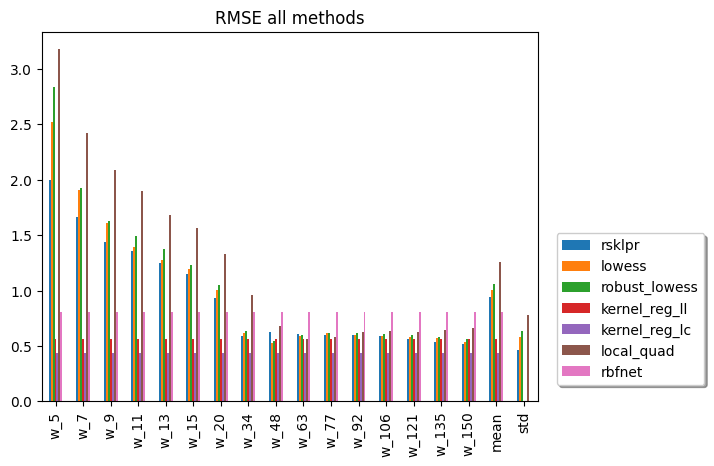

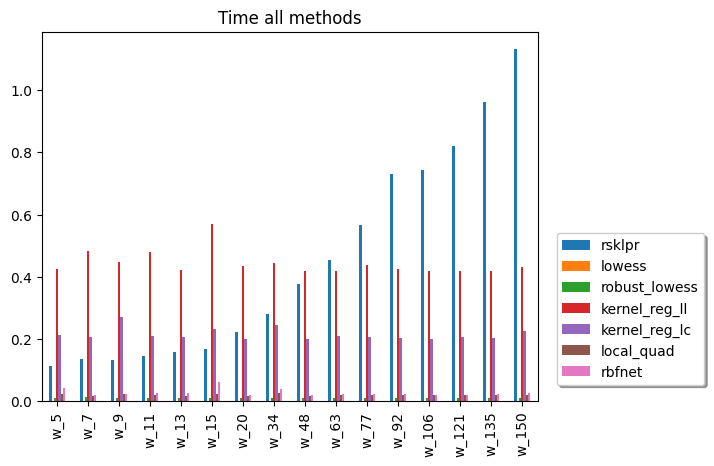

In [24]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_2,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="conden",
    methods=methods,
)

In [25]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.438252
w_7    kernel_reg_lc  0.438252
w_9    kernel_reg_lc  0.438252
w_11   kernel_reg_lc  0.438252
w_13   kernel_reg_lc  0.438252
w_15   kernel_reg_lc  0.438252
w_20   kernel_reg_lc  0.438252
w_34   kernel_reg_lc  0.438252
w_48   kernel_reg_lc  0.438252
w_63   kernel_reg_lc  0.438252
w_77   kernel_reg_lc  0.438252
w_92   kernel_reg_lc  0.438252
w_106  kernel_reg_lc  0.438252
w_121  kernel_reg_lc  0.438252
w_135  kernel_reg_lc  0.438252
w_150  kernel_reg_lc  0.438252

In [26]:
worst_for_window

method      rmse
w_5    local_quad  3.175127
w_7    local_quad  2.424493
w_9    local_quad  2.086843
w_11   local_quad  1.897252
w_13   local_quad  1.678385
w_15   local_quad  1.567015
w_20   local_quad  1.331186
w_34   local_quad  0.960807
w_48       rbfnet  0.804795
w_63       rbfnet  0.804795
w_77       rbfnet  0.804795
w_92       rbfnet  0.804795
w_106      rbfnet  0.804795
w_121      rbfnet  0.804797
w_135      rbfnet  0.804797
w_150      rbfnet  0.804808

## Curve 3

### Mild noise

Best performing method is local_quad for size_neighborhood w_77


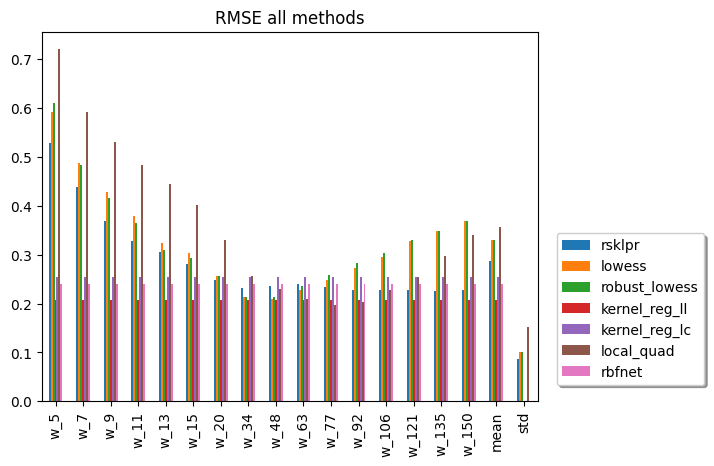

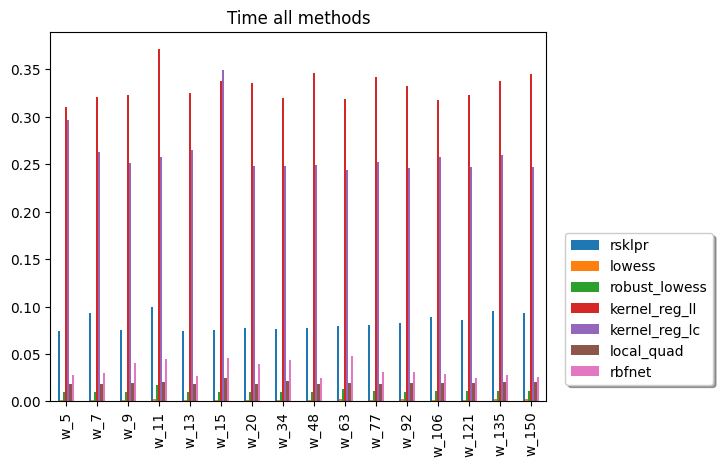

In [27]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_3,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [28]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.206282
w_7    kernel_reg_ll  0.206282
w_9    kernel_reg_ll  0.206282
w_11   kernel_reg_ll  0.206282
w_13   kernel_reg_ll  0.206282
w_15   kernel_reg_ll  0.206282
w_20   kernel_reg_ll  0.206282
w_34   kernel_reg_ll  0.206282
w_48   kernel_reg_ll  0.206282
w_63   kernel_reg_ll  0.206282
w_77      local_quad  0.196119
w_92      local_quad  0.202291
w_106  kernel_reg_ll  0.206282
w_121  kernel_reg_ll  0.206282
w_135  kernel_reg_ll  0.206282
w_150  kernel_reg_ll  0.206282

In [29]:
worst_for_window

method      rmse
w_5       local_quad  0.719432
w_7       local_quad  0.592371
w_9       local_quad  0.529881
w_11      local_quad  0.482471
w_13      local_quad  0.445351
w_15      local_quad  0.402290
w_20      local_quad  0.330360
w_34      local_quad  0.256334
w_48   kernel_reg_lc  0.254416
w_63   kernel_reg_lc  0.254416
w_77   robust_lowess  0.258435
w_92   robust_lowess  0.282010
w_106  robust_lowess  0.302875
w_121  robust_lowess  0.330176
w_135  robust_lowess  0.347865
w_150         lowess  0.369559

### Medium noise

Best performing method is rsklpr for size_neighborhood w_150


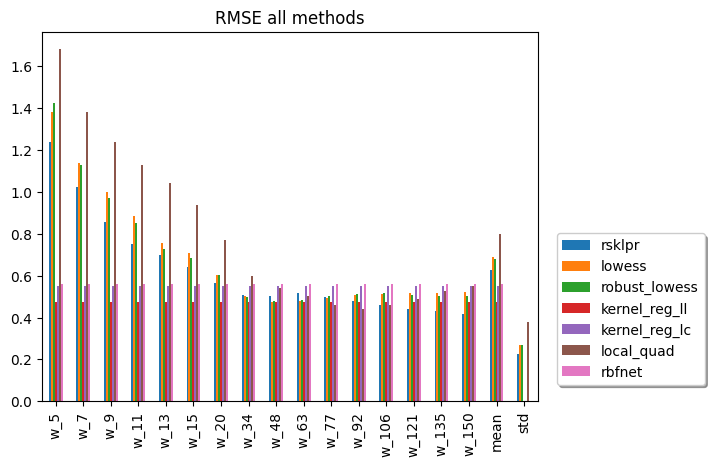

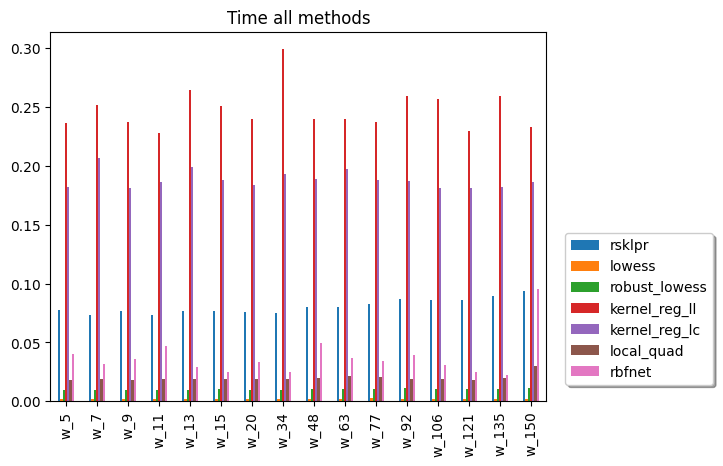

In [30]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_3,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [31]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.471771
w_7    kernel_reg_ll  0.471771
w_9    kernel_reg_ll  0.471771
w_11   kernel_reg_ll  0.471771
w_13   kernel_reg_ll  0.471771
w_15   kernel_reg_ll  0.471771
w_20   kernel_reg_ll  0.471771
w_34   kernel_reg_ll  0.471771
w_48   kernel_reg_ll  0.471771
w_63   kernel_reg_ll  0.471771
w_77      local_quad  0.458862
w_92      local_quad  0.442662
w_106         rsklpr  0.458126
w_121         rsklpr  0.440001
w_135         rsklpr  0.429089
w_150         rsklpr  0.417518

In [32]:
worst_for_window

method      rmse
w_5    local_quad  1.678675
w_7    local_quad  1.382201
w_9    local_quad  1.236401
w_11   local_quad  1.125789
w_13   local_quad  1.039204
w_15   local_quad  0.938775
w_20   local_quad  0.771057
w_34   local_quad  0.599859
w_48       rbfnet  0.561308
w_63       rbfnet  0.561288
w_77       rbfnet  0.561312
w_92       rbfnet  0.561264
w_106      rbfnet  0.561311
w_121      rbfnet  0.561281
w_135      rbfnet  0.561250
w_150      rbfnet  0.561275

### High noise

Best performing method is rsklpr for size_neighborhood w_150


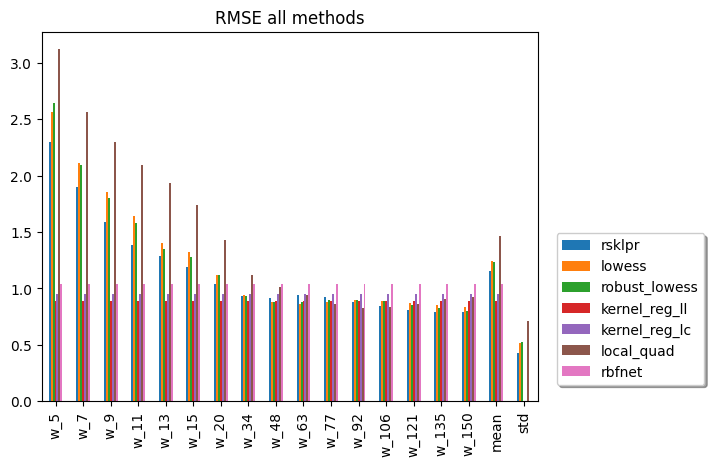

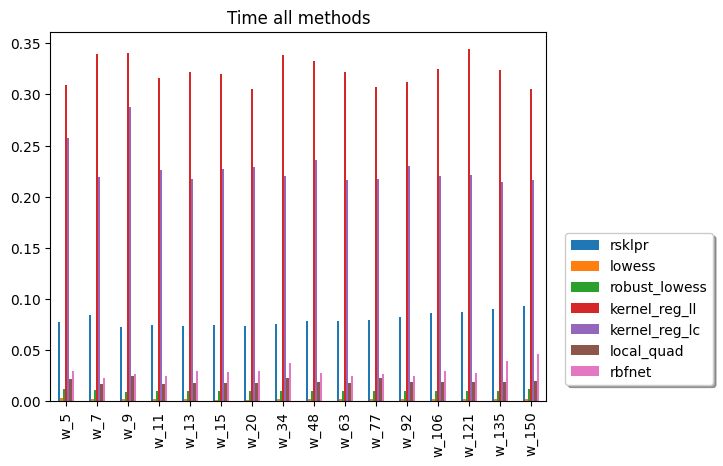

In [33]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_3,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [34]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.886265
w_7    kernel_reg_ll  0.886265
w_9    kernel_reg_ll  0.886265
w_11   kernel_reg_ll  0.886265
w_13   kernel_reg_ll  0.886265
w_15   kernel_reg_ll  0.886265
w_20   kernel_reg_ll  0.886265
w_34   kernel_reg_ll  0.886265
w_48          lowess  0.882091
w_63          lowess  0.867078
w_77      local_quad  0.866416
w_92      local_quad  0.826368
w_106     local_quad  0.832624
w_121         rsklpr  0.809727
w_135         rsklpr  0.795246
w_150         rsklpr  0.789742

In [35]:
worst_for_window

method      rmse
w_5    local_quad  3.117539
w_7    local_quad  2.566945
w_9    local_quad  2.296182
w_11   local_quad  2.090767
w_13   local_quad  1.929983
w_15   local_quad  1.743502
w_20   local_quad  1.432104
w_34   local_quad  1.115212
w_48       rbfnet  1.042390
w_63       rbfnet  1.042160
w_77       rbfnet  1.042423
w_92       rbfnet  1.042266
w_106      rbfnet  1.042425
w_121      rbfnet  1.042447
w_135      rbfnet  1.042550
w_150      rbfnet  1.042538

### Extreme noise

Best performing method is rsklpr for size_neighborhood w_150


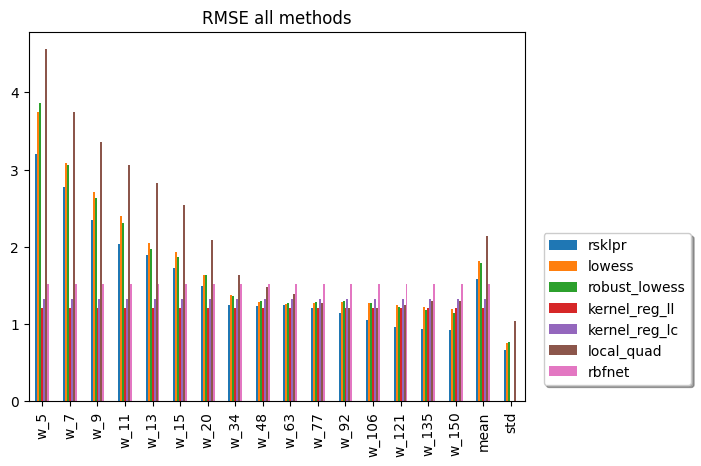

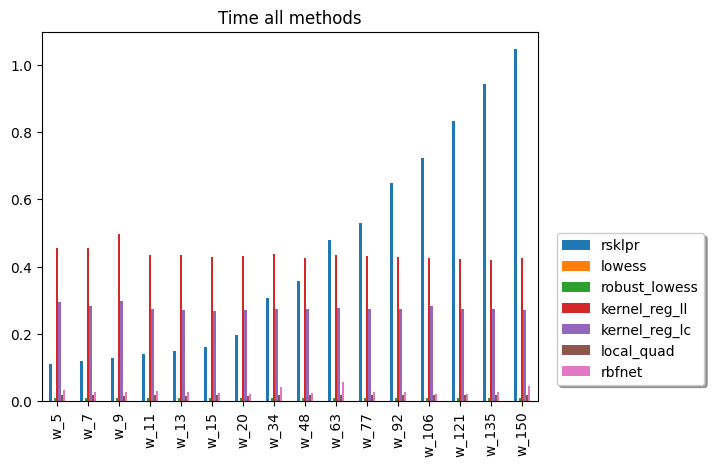

In [36]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_3,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="conden",
    methods=methods,
)

In [37]:
best_for_window

method      rmse
w_5    kernel_reg_ll  1.210413
w_7    kernel_reg_ll  1.210413
w_9    kernel_reg_ll  1.210413
w_11   kernel_reg_ll  1.210413
w_13   kernel_reg_ll  1.210413
w_15   kernel_reg_ll  1.210413
w_20   kernel_reg_ll  1.210413
w_34   kernel_reg_ll  1.210413
w_48   kernel_reg_ll  1.210413
w_63   kernel_reg_ll  1.210413
w_77          rsklpr  1.203050
w_92          rsklpr  1.142284
w_106         rsklpr  1.055782
w_121         rsklpr  0.968352
w_135         rsklpr  0.938091
w_150         rsklpr  0.922664

In [38]:
worst_for_window

method      rmse
w_5    local_quad  4.556404
w_7    local_quad  3.751690
w_9    local_quad  3.355963
w_11   local_quad  3.055744
w_13   local_quad  2.820762
w_15   local_quad  2.548229
w_20   local_quad  2.093151
w_34   local_quad  1.630578
w_48       rbfnet  1.523706
w_63       rbfnet  1.523537
w_77       rbfnet  1.523250
w_92       rbfnet  1.523184
w_106      rbfnet  1.523544
w_121      rbfnet  1.523535
w_135      rbfnet  1.523312
w_150      rbfnet  1.523427

## Curve 4

### Mild noise

Best performing method is rbfnet for size_neighborhood w_9


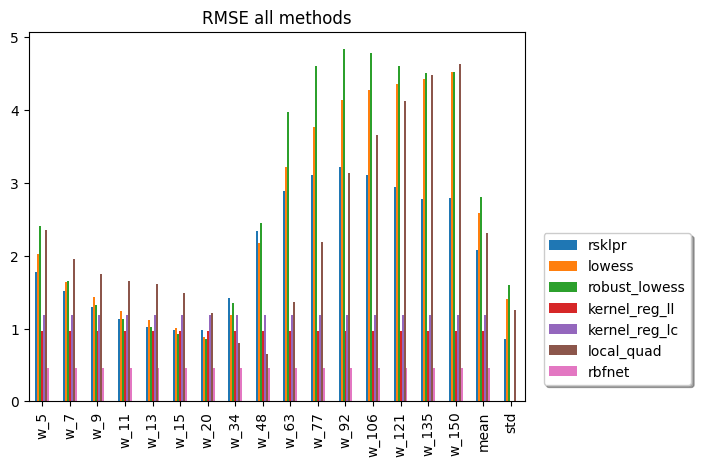

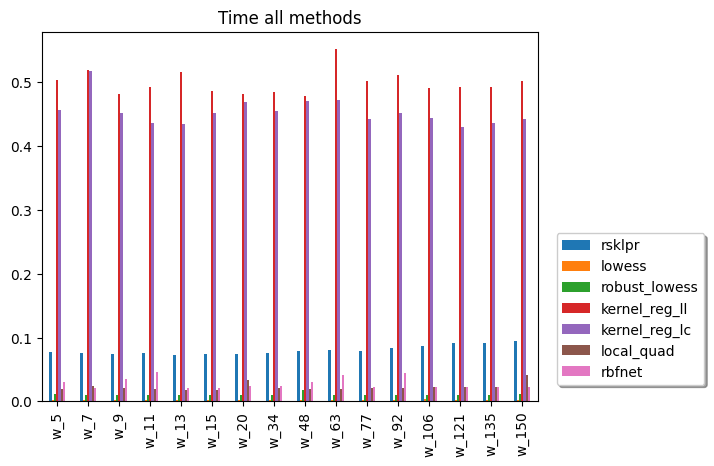

In [39]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_4,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [40]:
best_for_window

method      rmse
w_5    rbfnet  0.459965
w_7    rbfnet  0.460195
w_9    rbfnet  0.459866
w_11   rbfnet  0.460191
w_13   rbfnet  0.461050
w_15   rbfnet  0.461050
w_20   rbfnet  0.460208
w_34   rbfnet  0.460235
w_48   rbfnet  0.461050
w_63   rbfnet  0.460362
w_77   rbfnet  0.459912
w_92   rbfnet  0.461286
w_106  rbfnet  0.460191
w_121  rbfnet  0.461069
w_135  rbfnet  0.461010
w_150  rbfnet  0.461017

In [41]:
worst_for_window

method      rmse
w_5    robust_lowess  2.402554
w_7       local_quad  1.961669
w_9       local_quad  1.751756
w_11      local_quad  1.657846
w_13      local_quad  1.609604
w_15      local_quad  1.484784
w_20      local_quad  1.213963
w_34          rsklpr  1.424315
w_48   robust_lowess  2.444189
w_63   robust_lowess  3.971801
w_77   robust_lowess  4.608482
w_92   robust_lowess  4.832283
w_106  robust_lowess  4.787798
w_121  robust_lowess  4.607426
w_135  robust_lowess  4.508968
w_150     local_quad  4.626678

### Medium noise

Best performing method is rbfnet for size_neighborhood w_106


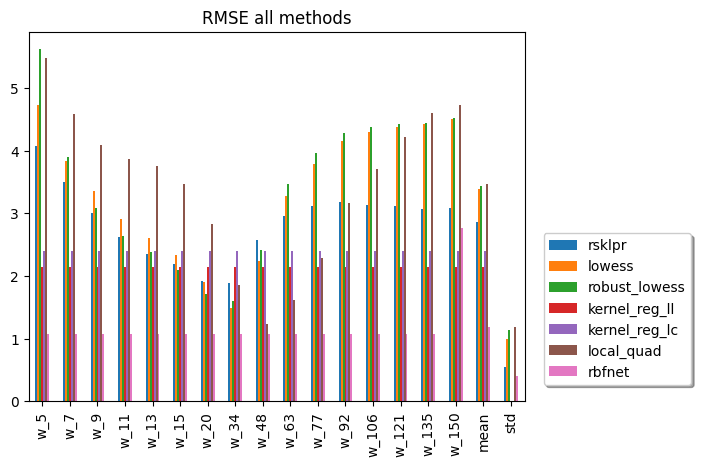

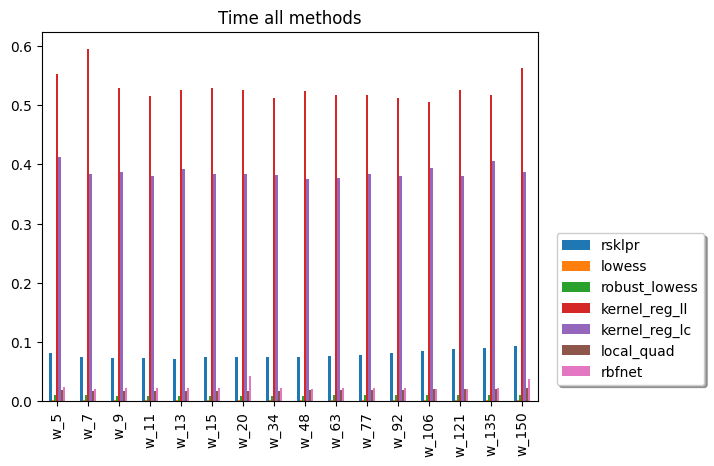

In [42]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_4,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="normal_reference",
    k2="joint",
    methods=methods,
)

In [43]:
best_for_window

method      rmse
w_5           rbfnet  1.076455
w_7           rbfnet  1.074152
w_9           rbfnet  1.073245
w_11          rbfnet  1.073000
w_13          rbfnet  1.073000
w_15          rbfnet  1.075804
w_20          rbfnet  1.073220
w_34          rbfnet  1.073245
w_48          rbfnet  1.075683
w_63          rbfnet  1.073356
w_77          rbfnet  1.073866
w_92          rbfnet  1.075482
w_106         rbfnet  1.072616
w_121         rbfnet  1.073255
w_135         rbfnet  1.073000
w_150  kernel_reg_ll  2.137574

In [44]:
worst_for_window

method      rmse
w_5    robust_lowess  5.612146
w_7       local_quad  4.577315
w_9       local_quad  4.087535
w_11      local_quad  3.868511
w_13      local_quad  3.756363
w_15      local_quad  3.463463
w_20      local_quad  2.829814
w_34   kernel_reg_lc  2.393623
w_48          rsklpr  2.579286
w_63   robust_lowess  3.471449
w_77   robust_lowess  3.968383
w_92   robust_lowess  4.276837
w_106  robust_lowess  4.381208
w_121  robust_lowess  4.418507
w_135     local_quad  4.597250
w_150     local_quad  4.730602

### High noise

Best performing method is robust_lowess for size_neighborhood w_34


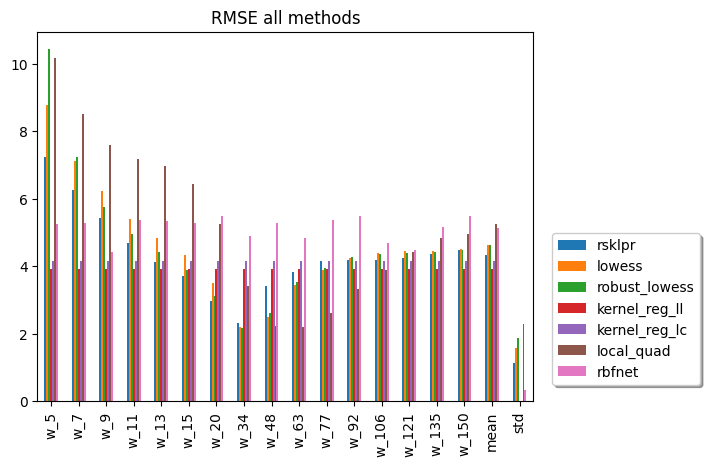

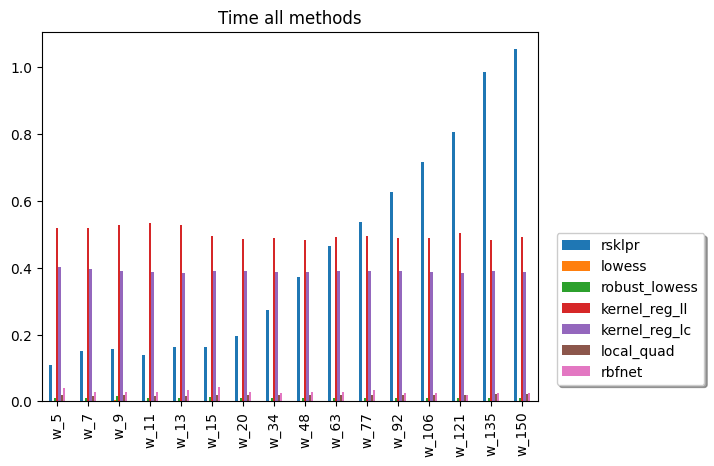

In [45]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_4,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="conden",
    methods=methods,
)

In [46]:
best_for_window

method      rmse
w_5    kernel_reg_ll  3.923847
w_7    kernel_reg_ll  3.923847
w_9    kernel_reg_ll  3.923847
w_11   kernel_reg_ll  3.923847
w_13   kernel_reg_ll  3.923847
w_15          rsklpr  3.706798
w_20          rsklpr  2.962385
w_34   robust_lowess  2.166168
w_48      local_quad  2.226782
w_63      local_quad  2.197047
w_77      local_quad  2.611219
w_92      local_quad  3.323489
w_106     local_quad  3.884592
w_121  kernel_reg_ll  3.923847
w_135  kernel_reg_ll  3.923847
w_150  kernel_reg_ll  3.923847

In [47]:
worst_for_window

method       rmse
w_5    robust_lowess  10.426934
w_7       local_quad   8.500785
w_9       local_quad   7.591204
w_11      local_quad   7.184510
w_13      local_quad   6.976508
w_15      local_quad   6.431497
w_20          rbfnet   5.479380
w_34          rbfnet   4.897347
w_48          rbfnet   5.292659
w_63          rbfnet   4.831849
w_77          rbfnet   5.362692
w_92          rbfnet   5.479380
w_106         rbfnet   4.700035
w_121         rbfnet   4.473594
w_135         rbfnet   5.167456
w_150         rbfnet   5.479380

### Extreme noise

Best performing method is kernel_reg_ll for size_neighborhood w_5


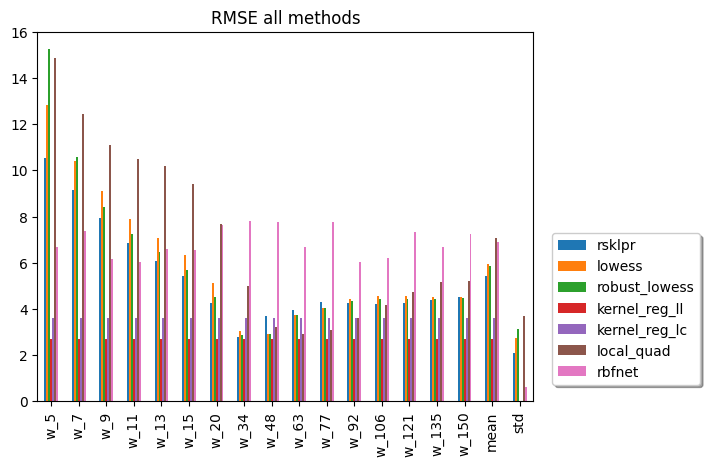

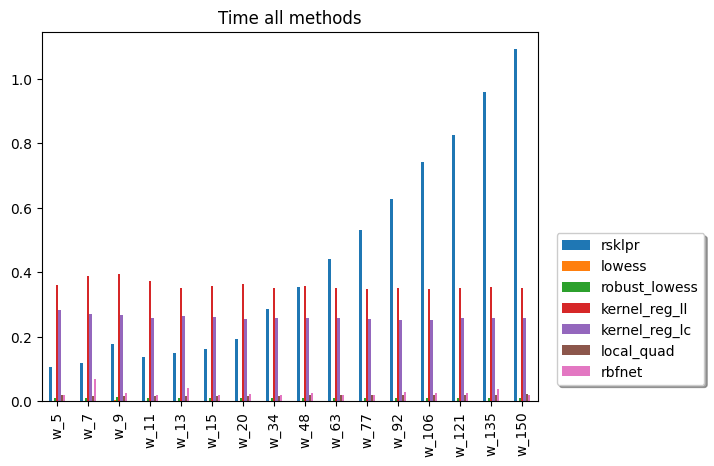

In [48]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_4,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="conden",
    methods=methods,
)

In [49]:
best_for_window

method      rmse
w_5    kernel_reg_ll  2.702912
w_7    kernel_reg_ll  2.702912
w_9    kernel_reg_ll  2.702912
w_11   kernel_reg_ll  2.702912
w_13   kernel_reg_ll  2.702912
w_15   kernel_reg_ll  2.702912
w_20   kernel_reg_ll  2.702912
w_34   kernel_reg_ll  2.702912
w_48   kernel_reg_ll  2.702912
w_63   kernel_reg_ll  2.702912
w_77   kernel_reg_ll  2.702912
w_92   kernel_reg_ll  2.702912
w_106  kernel_reg_ll  2.702912
w_121  kernel_reg_ll  2.702912
w_135  kernel_reg_ll  2.702912
w_150  kernel_reg_ll  2.702912

In [50]:
worst_for_window

method       rmse
w_5    robust_lowess  15.241665
w_7       local_quad  12.424255
w_9       local_quad  11.094872
w_11      local_quad  10.500511
w_13      local_quad  10.196654
w_15      local_quad   9.399534
w_20      local_quad   7.677487
w_34          rbfnet   7.796119
w_48          rbfnet   7.757985
w_63          rbfnet   6.688355
w_77          rbfnet   7.789021
w_92          rbfnet   6.024023
w_106         rbfnet   6.209753
w_121         rbfnet   7.350971
w_135         rbfnet   6.688355
w_150         rbfnet   7.248056

## Curve 5

### Mild noise

Best performing method is rsklpr for size_neighborhood w_20


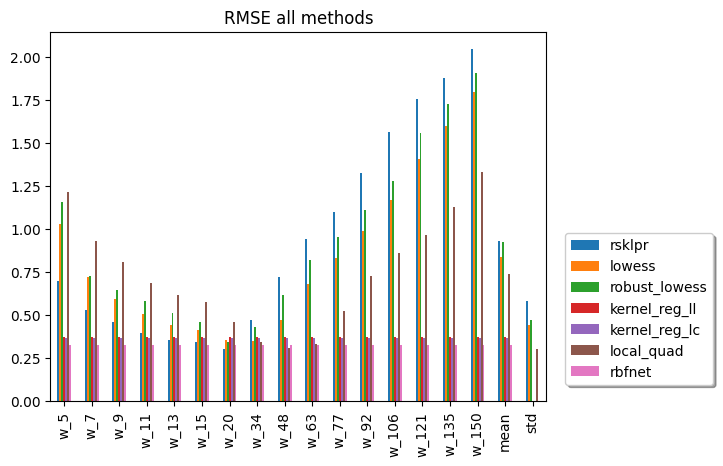

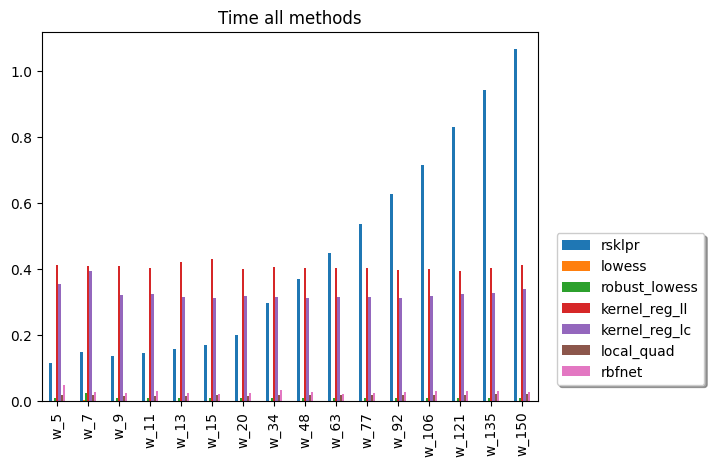

In [51]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_5,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="conden",
    methods=methods,
)

In [52]:
best_for_window

method      rmse
w_5        rbfnet  0.328564
w_7        rbfnet  0.328635
w_9        rbfnet  0.328586
w_11       rbfnet  0.328658
w_13       rbfnet  0.328606
w_15       rbfnet  0.328638
w_20       rsklpr  0.302434
w_34       rbfnet  0.328586
w_48   local_quad  0.309178
w_63       rbfnet  0.328647
w_77       rbfnet  0.328635
w_92       rbfnet  0.328609
w_106      rbfnet  0.328620
w_121      rbfnet  0.328559
w_135      rbfnet  0.328481
w_150      rbfnet  0.328550

In [53]:
worst_for_window

method      rmse
w_5    local_quad  1.219002
w_7    local_quad  0.932264
w_9    local_quad  0.808547
w_11   local_quad  0.687368
w_13   local_quad  0.619489
w_15   local_quad  0.576647
w_20   local_quad  0.463708
w_34       rsklpr  0.472552
w_48       rsklpr  0.723929
w_63       rsklpr  0.941418
w_77       rsklpr  1.101747
w_92       rsklpr  1.327906
w_106      rsklpr  1.563667
w_121      rsklpr  1.756880
w_135      rsklpr  1.877261
w_150      rsklpr  2.044743

### Medium noise

Best performing method is local_quad for size_neighborhood w_63


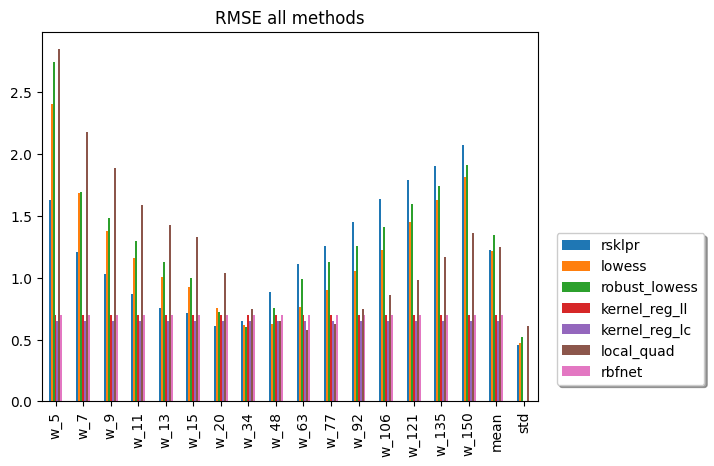

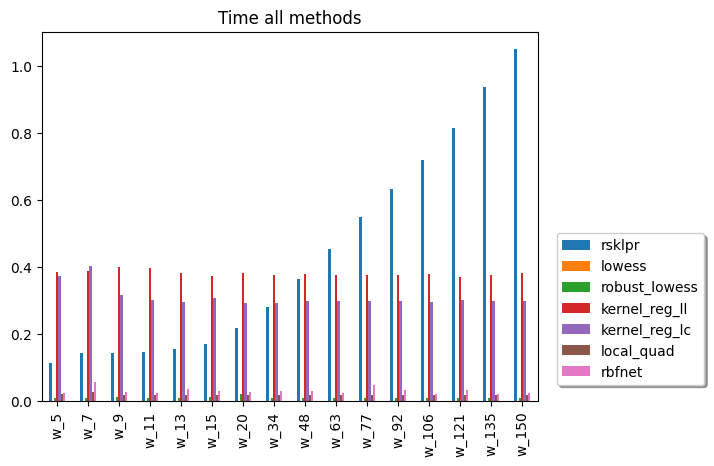

In [54]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_5,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="conden",
    methods=methods,
)

In [55]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.652586
w_7    kernel_reg_lc  0.652586
w_9    kernel_reg_lc  0.652586
w_11   kernel_reg_lc  0.652586
w_13   kernel_reg_lc  0.652586
w_15   kernel_reg_lc  0.652586
w_20          rsklpr  0.611346
w_34   robust_lowess  0.603759
w_48          lowess  0.626874
w_63      local_quad  0.574401
w_77      local_quad  0.628850
w_92   kernel_reg_lc  0.652586
w_106  kernel_reg_lc  0.652586
w_121  kernel_reg_lc  0.652586
w_135  kernel_reg_lc  0.652586
w_150  kernel_reg_lc  0.652586

In [56]:
worst_for_window

method      rmse
w_5    local_quad  2.843701
w_7    local_quad  2.173103
w_9    local_quad  1.885130
w_11   local_quad  1.589945
w_13   local_quad  1.429077
w_15   local_quad  1.327398
w_20   local_quad  1.036176
w_34   local_quad  0.750452
w_48       rsklpr  0.887513
w_63       rsklpr  1.111515
w_77       rsklpr  1.257073
w_92       rsklpr  1.449881
w_106      rsklpr  1.639186
w_121      rsklpr  1.786734
w_135      rsklpr  1.899901
w_150      rsklpr  2.069565

### High noise

Best performing method is local_quad for size_neighborhood w_92


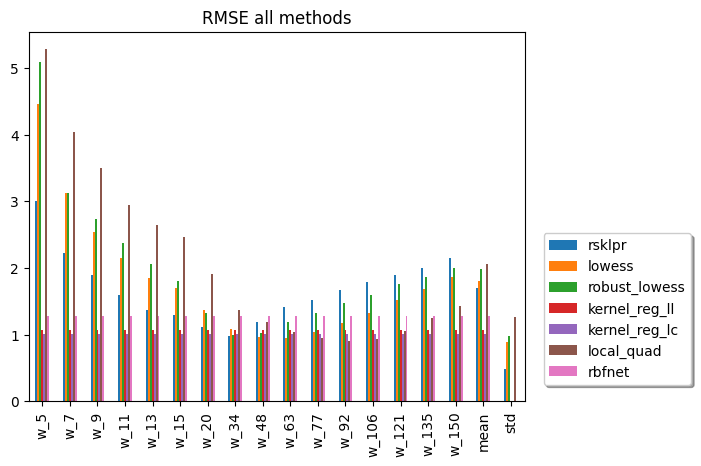

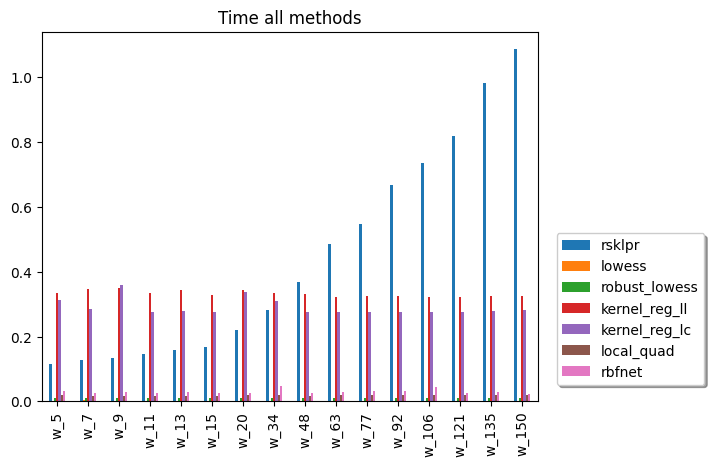

In [57]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_5,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="conden",
    methods=methods,
)

In [58]:
best_for_window

method      rmse
w_5    kernel_reg_lc  1.004060
w_7    kernel_reg_lc  1.004060
w_9    kernel_reg_lc  1.004060
w_11   kernel_reg_lc  1.004060
w_13   kernel_reg_lc  1.004060
w_15   kernel_reg_lc  1.004060
w_20   kernel_reg_lc  1.004060
w_34          rsklpr  0.988677
w_48          lowess  0.961133
w_63          lowess  0.957182
w_77      local_quad  0.944596
w_92      local_quad  0.912515
w_106     local_quad  0.937083
w_121  kernel_reg_lc  1.004060
w_135  kernel_reg_lc  1.004060
w_150  kernel_reg_lc  1.004060

In [59]:
worst_for_window

method      rmse
w_5    local_quad  5.281383
w_7    local_quad  4.036097
w_9    local_quad  3.502656
w_11   local_quad  2.947887
w_13   local_quad  2.648875
w_15   local_quad  2.460507
w_20   local_quad  1.905638
w_34   local_quad  1.372033
w_48       rbfnet  1.277880
w_63       rsklpr  1.411367
w_77       rsklpr  1.520216
w_92       rsklpr  1.664813
w_106      rsklpr  1.793268
w_121      rsklpr  1.897084
w_135      rsklpr  2.000913
w_150      rsklpr  2.154855

### Extreme noise

Best performing method is local_quad for size_neighborhood w_106


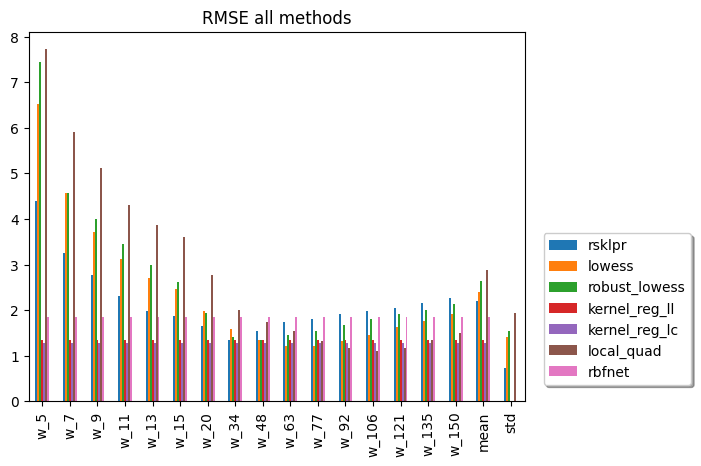

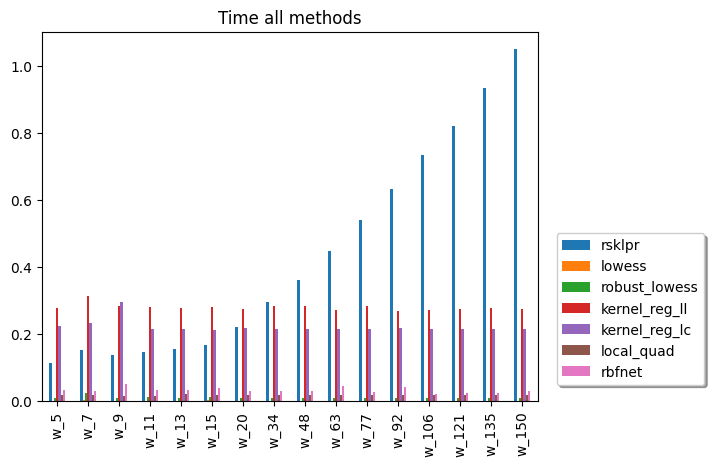

In [60]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_curve_5,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="conden",
    methods=methods,
)

In [61]:
best_for_window

method      rmse
w_5    kernel_reg_lc  1.273993
w_7    kernel_reg_lc  1.273993
w_9    kernel_reg_lc  1.273993
w_11   kernel_reg_lc  1.273993
w_13   kernel_reg_lc  1.273993
w_15   kernel_reg_lc  1.273993
w_20   kernel_reg_lc  1.273993
w_34   kernel_reg_lc  1.273993
w_48   kernel_reg_lc  1.273993
w_63          lowess  1.206938
w_77          lowess  1.225322
w_92      local_quad  1.178979
w_106     local_quad  1.097612
w_121     local_quad  1.166754
w_135  kernel_reg_lc  1.273993
w_150  kernel_reg_lc  1.273993

In [62]:
worst_for_window

method      rmse
w_5    local_quad  7.719185
w_7    local_quad  5.899420
w_9    local_quad  5.120685
w_11   local_quad  4.306609
w_13   local_quad  3.869710
w_15   local_quad  3.594954
w_20   local_quad  2.777240
w_34   local_quad  1.997057
w_48       rbfnet  1.861133
w_63       rbfnet  1.861590
w_77       rbfnet  1.859795
w_92       rsklpr  1.914515
w_106      rsklpr  1.986950
w_121      rsklpr  2.053714
w_135      rsklpr  2.149443
w_150      rsklpr  2.276049